In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
import joblib
import os

from impyute.imputation.cs import fast_knn
from sklearn.impute import KNNImputer, SimpleImputer
from scipy import stats
from scipy.stats import chi2_contingency
from itertools import combinations
from sklearn.metrics import matthews_corrcoef
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
# 폰트 파일의 경로 지정
font_path = r'C:\Windows\Fonts\gulim.ttc'

In [3]:
# matplotlib 패키지에 한글 폰트 설정
myFont = fm.FontProperties(fname = font_path).get_name()
mpl.rc('font', family = myFont)

In [4]:
data_file = './DATA/bald_probability.csv'

In [5]:
baldDF = pd.read_csv(data_file)
baldDF.shape

(7917, 14)

In [6]:
# 중복 데이터 82개 삭제
baldDF = baldDF.drop_duplicates()
baldDF.shape

(7835, 14)

In [7]:
# bald_prob가 결측된 데이터 삭제
baldDF = baldDF.dropna(subset = ['bald_prob'])
baldDF.shape

(7757, 14)

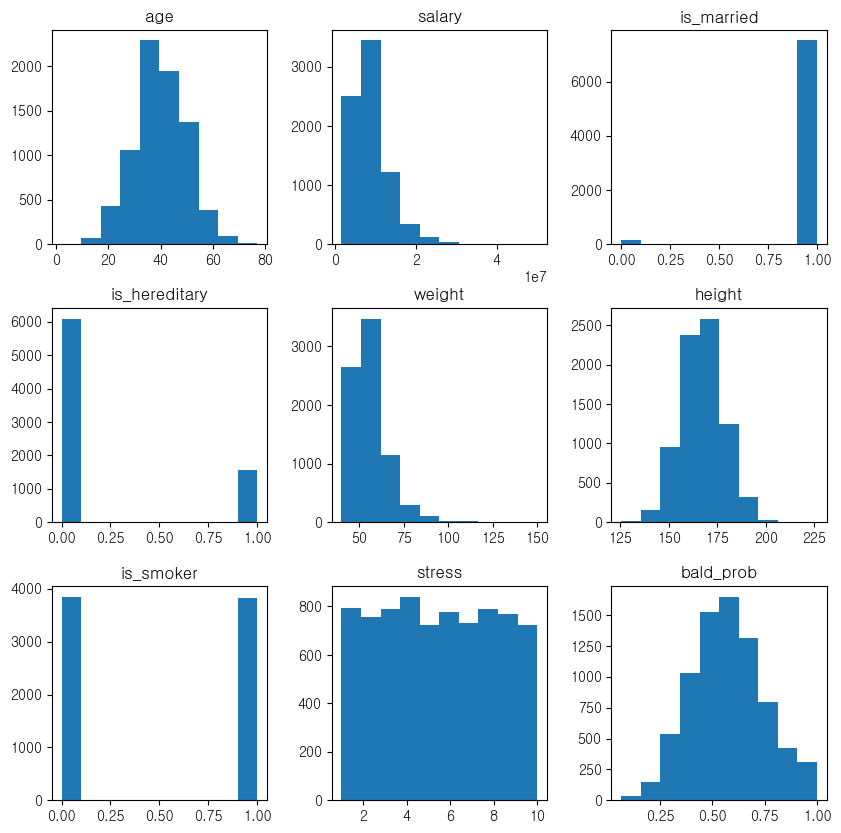

In [13]:
# 수치형 데이터 히스토그램
baldDF.hist(figsize = (10, 10), grid = False)
plt.show()

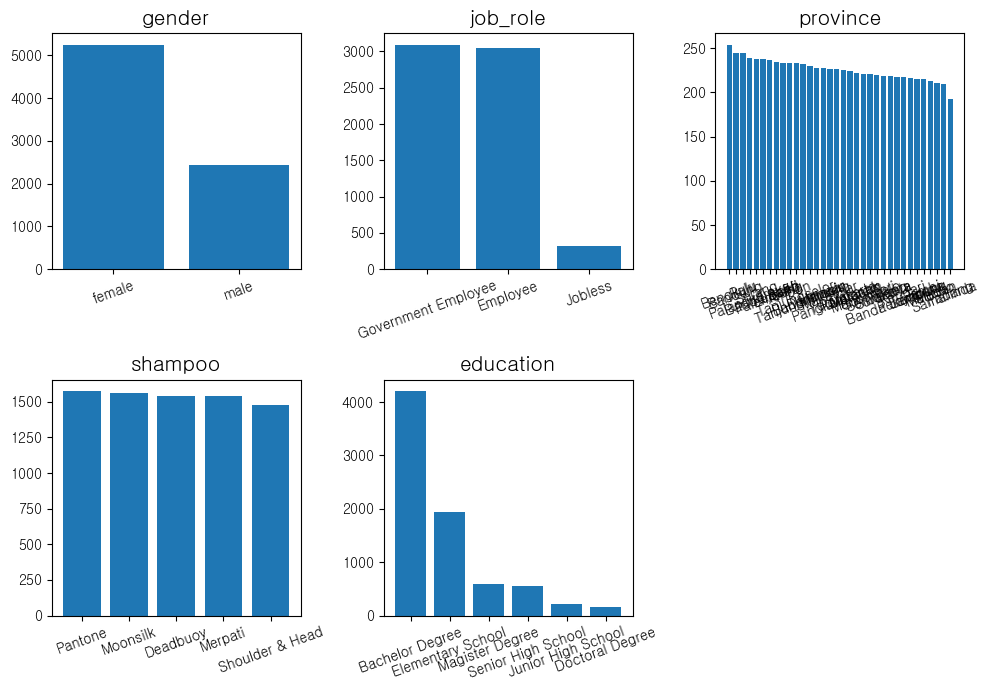

In [15]:
# 범주형 데이터 히스토그램
ind = 1
plt.figure(figsize = (10, 7))
for col in baldDF.select_dtypes('object').columns:
    plt.subplot(2, 3, ind)
    plt.title(col, size = 15)
    plt.bar(range(baldDF[col].nunique()), baldDF[col].value_counts())
    plt.xticks(range(baldDF[col].nunique()), baldDF[col].dropna().unique(), rotation = 20)  # unique() 함수는 결측치도 카운트한다.
    ind += 1

plt.tight_layout()
plt.show()

In [16]:
#baldDF.groupby('gender')
maleDF = baldDF.groupby('gender').get_group('male')
femaleDF = baldDF.groupby('gender').get_group('female')
print(f'male => {maleDF.shape[0]}개\n\nfemale = > {femaleDF.shape[0]}개')
maleDF['height'].describe(), femaleDF['height'].describe()

male => 5253개

female = > 2431개


(count    5208.000000
 mean      167.369941
 std        10.929387
 min       125.491784
 25%       159.797815
 50%       167.284425
 75%       174.691254
 max       226.454577
 Name: height, dtype: float64,
 count    2404.000000
 mean      166.978757
 std        10.908456
 min       128.048914
 25%       159.637706
 50%       166.952406
 75%       173.965169
 max       211.285582
 Name: height, dtype: float64)

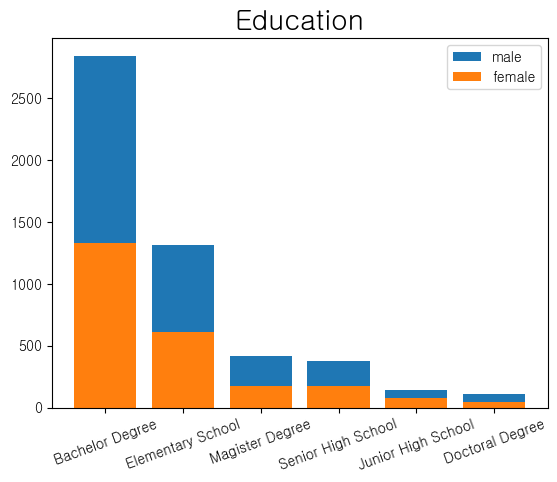

In [17]:
plt.bar(range(maleDF['education'].nunique()), maleDF['education'].value_counts(), label = 'male')
plt.bar(range(femaleDF['education'].nunique()), femaleDF['education'].value_counts(), label = 'female')
plt.xticks(range(baldDF['education'].nunique()), baldDF['education'].dropna().unique(), rotation = 20)
plt.title('Education', size = 20)
plt.legend()
plt.show()